In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Creating a mock catalogue with Galaxia**
Galaxia needs an input parameter file which I have prepared in the input folder. It will sample 10% of the stars with an apparent V magnitude brighter than 11th mag (without extinction). Have a look at the file and compare with the Galaxia instructions [http://galaxia.sourceforge.net/Galaxia3pub.html].

In [2]:
import subprocess, os, shutil, ebf, sys
from numpy.lib.recfunctions import append_fields
from astropy.io import fits
## Running galaxia in the command line. This will take some time (ca. 10min).
# Now we want to convert the ebf file to numpy files
path = os.path.abspath('../library/')
if path not in sys.path:
    sys.path.append(path)

from convert_to_recarray import convert

In [3]:
# Here we create the folder where Galaxia will write the mock catalogue
nside = 16 # for extinction map and mollweide plot

################### All strings and float except for
outputFile = "GDR2mock_20.7Gmag"
modelFile = "Model/population_parameters_mrtd5.ebf"
codeDataDir = "/home/rybizki/Programme/GalaxiaData"
outputDir = '../output/mock_cat_new'
photoSys = "parsec1/GAIADR2_TMASS"
magcolorNames = "gaia_g,gaia_gbp-gaia_grp"
appMagLimits0 = -1000 
appMagLimits1 = 20.7
absMagLimits0 = -1000
absMagLimits1 = 1000
colorLimits0 = -1000
colorLimits1 = 1000
geometryOption = 0 #int
longitude = 0
latitude = 90
surveyArea = 1000
fSample = 0.0001
popID = -1 #int
warpFlareOn = 1 #int
seed = 1 #int
r_max = 1000
starType = 0 #int
photoError = 0 #int

folder_create = outputDir + '/'
if os.path.exists(folder_create):
    shutil.rmtree(folder_create)
    os.mkdir(folder_create)
    print(folder_create, "existed and was recreated")
else:
    os.mkdir(folder_create)
###################
# Creating the parameterfile
filedata = 'outputFile                          %s\nmodelFile                          %s\ncodeDataDir                          %s\noutputDir                           %s\nphotoSys                            %s\nmagcolorNames                       %s\nappMagLimits[0]                     %f\nappMagLimits[1]                     %f\nabsMagLimits[0]                     %f\nabsMagLimits[1]                     %f\ncolorLimits[0]                      %f\ncolorLimits[1]                      %f\ngeometryOption                      %d\nlongitude                           %f\nlatitude                            %f\nsurveyArea                          %f\nfSample                             %f\npopID                               %d\nwarpFlareOn                         %d\nseed                                %d\nr_max                               %f\nstarType                            %d\nphotoError                          %d\n' %(outputFile,modelFile,codeDataDir,outputDir,photoSys,magcolorNames,appMagLimits0,appMagLimits1,absMagLimits0,absMagLimits1,colorLimits0,colorLimits1,geometryOption,longitude,latitude,surveyArea,fSample,popID,warpFlareOn,seed,r_max,starType,photoError)
myparameterfile = outputDir + '/' + outputFile + '.log'
file = open(myparameterfile, "w")
file.write(filedata)
file.close()

In [4]:
# Creating mock catalogue
args = ['galaxia', '-r', myparameterfile]
p = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE)	
print("Galaxia spawns catalogue")
(output, err) = p.communicate()
#p_status = p.wait()
print(output)

Galaxia spawns catalogue
b'Galaxia-v0.81\nCODEDATAPATH=/home/rybizki/Programme/GalaxiaData/\nReading Parameter file-             ../output/mock_cat_new/GDR2mock_20.7Gmag.log\n--------------------------------------------------------\noutputFile               GDR2mock_20.7Gmag       \nmodelFile                Model/population_parameters_mrtd5.ebf\ncodeDataDir              /home/rybizki/Programme/GalaxiaData\noutputDir                ../output/mock_cat_new  \nphotoSys                 parsec1/GAIADR2_TMASS   \nmagcolorNames            gaia_g,gaia_gbp-gaia_grp\nappMagLimits[0]          -1000.000000            \nappMagLimits[1]          20.700000               \nabsMagLimits[0]          -1000.000000            \nabsMagLimits[1]          1000.000000             \ncolorLimits[0]           -1000.000000            \ncolorLimits[1]           1000.000000             \ngeometryOption           0                       \nlongitude                0.000000                \nlatitude                 90.0

You can add other photometric systems using 

```
galaxia -a --psys=photometricSystem galaxy1.ebf
```
for photometric system you can use SDSS, UBV or Gaia which are in the Galaxia isochrones folder. You can get updated photometric bands from PARSEC isochrones compiled from [http://stev.oapd.inaf.it/cgi-bin/cmd] here [https://keeper.mpdl.mpg.de/d/4d6cb73b17524416ba43/]. Simply copy paste them into the respective Galaxia folder.

In [5]:
"""
# Adding other photometric bands
args = ['galaxia', '-a', '--psys=Gaia' ,'../output/' + filename]
p = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE)	
print("Galaxia adds Gaia bands")
(output, err) = p.communicate()
#p_status = p.wait()
print(output)
"""

'\n# Adding other photometric bands\nargs = [\'galaxia\', \'-a\', \'--psys=Gaia\' ,\'../output/\' + filename]\np = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE)\t\nprint("Galaxia adds Gaia bands")\n(output, err) = p.communicate()\n#p_status = p.wait()\nprint(output)\n'

In [6]:
# Reading in the Catalogue and converting it to npy file. (If you added photometric bands then you will have to edit the convert routine)
bes = ebf.read(outputDir + "/" + outputFile + ".ebf",'/')
x = convert(bes)
print(len(x))
print(x.dtype.names)


611561
('rad', 'teff', 'vx', 'vy', 'vz', 'pz', 'px', 'py', 'feh', 'exbv_schlegel', 'lum', 'glon', 'glat', 'alpha', 'smass', 'age', 'grav', 'gaia_g', 'gaia_gbp', 'gaia_grp', 'tmass_j', 'tmass_h', 'tmass_ks')


In [7]:
# We add ra and dec

from astropy.coordinates import SkyCoord
from astropy import units as u


x = append_fields(x,('ra','dec'),(np.zeros(len(x)),np.zeros(len(x))),usemask=False)
c = SkyCoord(b=x['glat'], l=x['glon'], frame = 'galactic', unit=(u.deg, u.deg))
x['ra'] = c.icrs.ra.deg
x['dec'] = c.icrs.dec.deg


In [8]:
## Turning absolute into apparent magnitudes

filternames = ['tmass_j','tmass_h','tmass_ks','gaia_g','gaia_gbp','gaia_grp']	
for band in filternames:
    x[band] += 5 * np.log10(x['rad']*1000.) - 5

In [9]:
## Optional you can use extinctions from Bovy 2016 python package mwdust (using Green2015, Marshall2006 and Schlegel)
from make_bovy_extinction import apply_bovy_extinction
x = apply_bovy_extinction(x,nside)

/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)

/home/rybizki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

611561
0 3028
1000 3028
2000 3028
3000 3028
1.604776157448807


In [10]:
# Adding extinctions on top

## Adding extinction to apparent magnitudes
## Gaia extinction
gaia_g_ext = x['exbv_schlegel'] * 2.3# just guessed
x['gaia_g'] += gaia_g_ext
gaia_g_bp_ext = x['exbv_schlegel'] * 2.8 # from Jordi+ 2010 and Schlafly + Finkbeiner 2011 closest effective wavelength
x['gaia_gbp'] += gaia_g_bp_ext 
gaia_g_rp_ext = x['exbv_schlegel'] * 1.52 # from Jordi+ 2010 and Schlafly + Finkbeiner 2011 closest effective wavelength
x['gaia_grp'] += gaia_g_rp_ext

## Other bands
filternames = ['tmass_j','tmass_h','tmass_ks']#,'gaia_g','gaia_g_bp','gaia_g_rp']	
extinction_coefficients = [0.709, 0.449, 0.302] #List from Schlafly & Finkbeiner 2011
for i,band in enumerate(filternames):
    x[band] += x['exbv_schlegel'] * extinction_coefficients[i]

In [11]:
# Now create a mag limited sample roughly half of the sample will be lost due to extinction
print(len(x))
cut = (x['gaia_g']<appMagLimits1)
x = x[cut]
print(len(x))

611561
145036


In [12]:
np.save(outputDir + "/" + outputFile,x)
fits.writeto(outputDir + "/" + outputFile + ".fits",x)

/home/rybizki/Desktop/Galaxia_wrap-master/library/defaults.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rybizki/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rybizki/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    iol

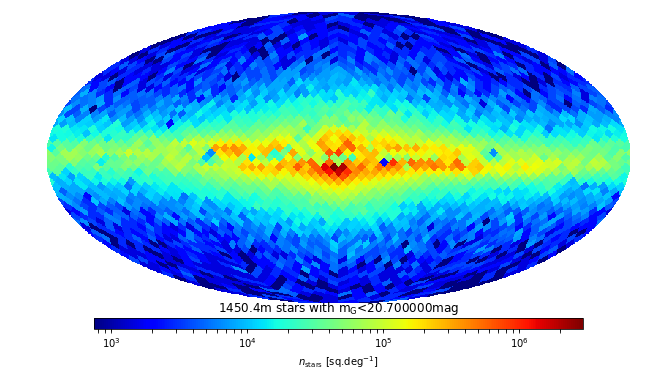

In [13]:
### Plot the stellar density across the sky
## Using plotting routines from Tri Astraatmadja
import healpy as hp
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import matplotlib
from defaults import getLogTickMarks


x = np.load(outputDir + "/" + outputFile + '.npy')
NSIDE = nside
oversampling = 1./fSample
total = len(x)
x['glon'] = x['glon'] * (np.pi/180.)
x['glat'] = (90.-x['glat']) * (np.pi/180.)
print('total number of stars = %.d' %(total * oversampling))
count = hp.ang2pix(NSIDE,x['glat'],x['glon'])
sqdegs = 41253
pixels = NSIDE * NSIDE * 12
pixel_per_sqdeg = pixels / float(sqdegs)
min_density = oversampling * pixel_per_sqdeg 
m = np.arange(hp.nside2npix(NSIDE))
density = np.zeros(hp.nside2npix(NSIDE))
for item in count:
    density[item] += oversampling * pixel_per_sqdeg
print(np.min(density))
print(sum(density)/pixel_per_sqdeg)
print(sum(density))
cmap = cm.jet
cmap.set_under(cmap(0.0))
cmap.set_over(cmap(1.0))
norm=LogNorm()
minVal = np.nanmin(density[density>0])
maxVal = np.nanmax(density[density<+np.inf])
density[density<minVal] = minVal
x['glon'] = x['glon'] * (180./np.pi)
cbLabel=r'$n_{\rm stars}$ [sq.deg$^{-1}$]'
hp.mollview(density, unit=cbLabel, min=minVal, max=maxVal, nest=False, title='', norm=norm, cmap=cmap, cbar=None)
fig = plt.gcf()
ax = plt.gca()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0 + 0.06,  pos1.width, pos1.height]
ax.set_position(pos2) # set a new position
im = ax.get_images()[0]
cbAx = fig.add_axes([0.1, 0.12, 0.8, 0.03])
cb = plt.colorbar(im, cax=cbAx, orientation='horizontal', )
cb.ax.minorticks_on()
tickMarks = getLogTickMarks(minVal, maxVal)
minorticks = im.norm(tickMarks)
cb.ax.xaxis.set_ticks(minorticks, minor=True)
cb.solids.set_edgecolor("face")
cb.set_label(cbLabel)
plt.title(r"%.1fm stars with m$_\mathrm{G}$<%fmag" %(total*oversampling/1e6,appMagLimits1), fontsize = 12)
plt.show()